# 캡스톤디자인 

In [1]:

#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import datetime
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance
!pip install prophet
import pandas as pd
from prophet import Prophet
import lightgbm as lgb
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

There are several categories in the Superstore sales data, I start from time series analysis and 
forecasting for Technology sales.

We have a good 4-year furniture sales data.

데이터 불러오기

In [4]:
location=("/content/Superstore.xls")
location2 = ("/content/Office Sales.xlsx")

In [5]:
data_original = pd.read_excel(location)

In [6]:
data_original2 = pd.read_excel(location2)

In [ ]:
data_original2.head()

,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,CustomerKey,ProductKey,CategoryName,SubcategoryName,ProductName,UnitPrice,OrderQuantity,Discount %,ShippingCost,OrderPriority
0,IN-2017-47883,2017-01-01,2017-01-08,Standard Class,56,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",25.26,5,0.5,11.92,Medium
1,IZ-2017-4680,2017-01-03,2017-01-07,Standard Class,66,FUR-NOV-10002791,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",166.71,4,0.6,9.81,High
2,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,64,FUR-CH-10000666,Furniture,Chairs,"SAFCO Chairmat, Black",57.39,2,0.2,8.30,Low
3,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,64,FUR-CH-10000214,Furniture,Chairs,"Hon Rocking Chair, Set of Two",132.87,2,0.0,9.63,Low
4,ES-2017-4869686,2017-01-03,2017-01-07,Standard Class,63,FUR-BO-10000728,Furniture,Bookcases,"Dania Corner Shelving, Traditional",122.07,7,0.6,12.56,Medium


EDA

In [7]:
# 수치형 변수와 범주형 변수를 가져오기 위해 describe() 응용

numeric_col = data_original.describe().columns # 연속형 변수
categorical_col = data_original.describe(include='object').columns # 범주형 변수

# 변수들 범위 및 클래스
print('####################수치형변수-Train####################')
for col in numeric_col:
    print(col, ':', data_original[col].max(), '~', data_original[col].min())
print('\n####################범주형변수-Train####################')
for col in categorical_col:
    print(col,':', data_original[col].unique(),'\n')

####################수치형변수-Train####################
Row ID : 9994 ~ 1
Postal Code : 99301 ~ 1040
Sales : 22638.48 ~ 0.44399999999999995
Quantity : 14 ~ 1
Discount : 0.8 ~ 0.0
Profit : 8399.975999999999 ~ -6599.978000000001

####################범주형변수-Train####################
Order ID : ['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914'] 

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

Customer ID : ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' '

In [8]:
# 수치형 변수와 범주형 변수를 가져오기 위해 describe() 응용

numeric_col = data_original2.describe().columns # 연속형 변수
categorical_col = data_original2.describe(include='object').columns # 범주형 변수

# 변수들 범위 및 클래스
print('####################수치형변수-Train####################')
for col in numeric_col:
    print(col, ':', data_original2[col].max(), '~', data_original2[col].min())
print('\n####################범주형변수-Train####################')
for col in categorical_col:
    print(col,':', data_original2[col].unique(),'\n')

####################수치형변수-Train####################
CustomerKey : 18857 ~ 56
UnitPrice : 925.23 ~ 1.74
OrderQuantity : 14 ~ 1
Discount % : 0.8 ~ 0.0
ShippingCost : 1304.48 ~ 0.05

####################범주형변수-Train####################
SalesOrderNumber : ['IN-2017-47883' 'IZ-2017-4680' 'ID-2017-80230' ... 'IN-2020-75603'
 'IN-2020-43550' 'RS-2020-1460'] 

ShipMode : ['Standard Class' 'Second Class' 'First Class' 'Same Day'] 

ProductKey : ['FUR-FU-10003447' 'FUR-NOV-10002791' 'FUR-CH-10000666' ...
 'FUR-FU-10003512' 'FUR-ELD-10001163' 'FUR-TA-10002557'] 

CategoryName : ['Furniture'] 

SubcategoryName : ['Furnishings' 'Chairs' 'Bookcases' 'Tables'] 

ProductName : ['Eldon Light Bulb, Duo Pack' 'Novimex Swivel Stool, Set of Two'
 'SAFCO Chairmat, Black' 'Hon Rocking Chair, Set of Two'
 'Dania Corner Shelving, Traditional'
 'Chromcraft Round Table, Adjustable Height'
 'Dania Classic Bookcase, Pine' 'Rubbermaid Photo Frame, Durable'
 'Advantus Frame, Durable' "Global Deluxe High-Back Manager'

TotalPrice 추가

In [9]:
data_original2['TotalPrice']=(data_original2.UnitPrice *data_original2.OrderQuantity)*(1-data_original2['Discount %'])-data_original2["ShippingCost"]

In [10]:
data_original2.head()

,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,CustomerKey,ProductKey,CategoryName,SubcategoryName,ProductName,UnitPrice,OrderQuantity,Discount %,ShippingCost,OrderPriority,TotalPrice
0,IN-2017-47883,2017-01-01,2017-01-08,Standard Class,56,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",25.26,5,0.5,11.92,Medium,51.230
1,IZ-2017-4680,2017-01-03,2017-01-07,Standard Class,66,FUR-NOV-10002791,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",166.71,4,0.6,9.81,High,256.926
2,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,64,FUR-CH-10000666,Furniture,Chairs,"SAFCO Chairmat, Black",57.39,2,0.2,8.30,Low,83.524
3,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,64,FUR-CH-10000214,Furniture,Chairs,"Hon Rocking Chair, Set of Two",132.87,2,0.0,9.63,Low,256.110
4,ES-2017-4869686,2017-01-03,2017-01-07,Standard Class,63,FUR-BO-10000728,Furniture,Bookcases,"Dania Corner Shelving, Traditional",122.07,7,0.6,12.56,Medium,329.236


변수명 맞춰주기

In [11]:
data_original2.rename(columns={'Discount %': 'Discount','UnitPrice':'Sales','TotalPrice':'profit','OrderQuantity':'Quantity'}, inplace=True)

In [12]:
data_original.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
data_original.shape

(9994, 21)

가구만 분석 할 것 임으로 가구 요소만 추출

In [14]:
# categories of sales data
data_original.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [15]:
# copy only the rows related to category = Technology
Furniture = data_original.loc[data_original['Category'] == 'Furniture']

가구로 이름 변경

In [16]:
Furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [17]:
# data_original range
Furniture['Order Date'].min(), Furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#  데이터들의 칼럼 확인

In [18]:
Furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [19]:
data_original2.columns

Index(['SalesOrderNumber', 'OrderDate', 'DeliveryDate', 'ShipMode',
       'CustomerKey', 'ProductKey', 'CategoryName', 'SubcategoryName',
       'ProductName', 'Sales', 'Quantity', 'Discount', 'ShippingCost',
       'OrderPriority', 'profit'],
      dtype='object')

# 필요없는 칼럼들을 제거

In [20]:
cols = ['SalesOrderNumber',
        'DeliveryDate',
        'ShipMode',
        'CustomerKey',
        'ProductKey',
        'CategoryName',
        'SubcategoryName',
        'ProductName',
        'ShippingCost']
data_original2.drop(cols,axis = 1 , inplace = True)

In [21]:
cols = ['OrderPriority']
data_original2.drop(cols,axis = 1 , inplace = True)

In [22]:
# columns to drop
cols = ['Row ID', 
        'Order ID', 
        'Ship Date', 
        'Ship Mode', 
        'Customer ID', 
        'Customer Name', 
        'Segment', 
        'Country', 
        'City', 
        'State', 
        'Postal Code', 
        'Region', 
        'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name', ]

Furniture.drop(cols, axis=1, inplace=True)

# 서로 이름이 다른 칼럼의 이름을 맞춰줍니다.

In [23]:
data_original2.rename(columns={'OrderDate': 'Order Date'}, inplace=True)

In [24]:
data_original2.tail()

,Order Date,Sales,Quantity,Discount,profit
8573,2020-12-31,121.53,3,0.0,358.080
8574,2020-12-31,391.14,3,0.6,120.168
8575,2020-12-31,270.99,9,0.0,2339.600
8576,2020-12-31,108.60,4,0.3,284.280
8577,2020-12-31,43.80,1,0.7,-5.720


In [25]:
Furniture.tail()

,Order Date,Sales,Quantity,Discount,Profit
9962,2015-03-19,383.4656,4,0.32,-67.6704
9964,2016-12-05,13.4000,1,0.00,6.4320
9980,2015-09-06,85.9800,1,0.00,22.3548
9989,2014-01-21,25.2480,3,0.20,4.1028
9990,2017-02-26,91.9600,2,0.00,15.6332


In [26]:
Furniture.sort_values('Order Date', inplace=True)

# 널값확인

In [27]:
# check for null values
Furniture.isnull().sum()
data_original2.isnull().sum()

Order Date    0
Sales         0
Quantity      0
Discount      0
profit        0
dtype: int64

In [28]:
Furniture.columns

Index(['Order Date', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

# 날짜 기준 정렬

In [ ]:
Furniture.groupby('Order Date').size()

Order Date
2014-01-06    1
2014-01-07    1
2014-01-10    1
2014-01-11    1
2014-01-13    2
             ..
2017-12-24    5
2017-12-25    5
2017-12-28    6
2017-12-29    6
2017-12-30    1
Length: 889, dtype: int64

# 가구를 날짜와 판매량 기준 정렬

In [ ]:
temp = Furniture.groupby('Order Date')['Quantity'].size() 
temp[temp > 1].sort_values(ascending=False)

Order Date
2016-09-05    10
2016-12-01     9
2016-12-25     9
2017-10-30     9
2017-11-19     9
              ..
2017-02-16     2
2014-11-09     2
2017-02-25     2
2017-02-26     2
2014-01-13     2
Name: Quantity, Length: 536, dtype: int64

In [ ]:
Furniture = Furniture.groupby('Order Date')['Quantity'].sum().reset_index()

In [29]:
Furniture1 = Furniture.set_index('Order Date')
Furniture.index

Int64Index([7474, 7660,  866,  716, 2978, 4938, 6474,  970, 5465, 6327,
            ...
            6149,  954, 2431, 1877, 5457, 7636, 7632, 5131, 7635,  906],
           dtype='int64', length=2121)

In [30]:
Furniture2 = data_original2.set_index('Order Date')
data_original2.index

RangeIndex(start=0, stop=8578, step=1)

In [31]:
Furniture2

,Sales,Quantity,Discount,profit
Order Date,,,,
2017-01-01,25.26,5,0.5,51.230
2017-01-03,166.71,4,0.6,256.926
2017-01-03,57.39,2,0.2,83.524
2017-01-03,132.87,2,0.0,256.110
2017-01-03,122.07,7,0.6,329.236
...,...,...,...,...
2020-12-31,121.53,3,0.0,358.080
2020-12-31,391.14,3,0.6,120.168
2020-12-31,270.99,9,0.0,2339.600


In [32]:
Furniture1

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-06,2573.820,9,0.0,746.4078
2014-01-07,76.728,3,0.6,-53.7096
2014-01-10,51.940,1,0.0,21.2954
2014-01-11,9.940,2,0.0,3.0814
2014-01-13,545.940,6,0.0,87.3504
...,...,...,...,...
2017-12-29,258.750,3,0.0,77.6250
2017-12-29,1207.840,8,0.0,314.0384
2017-12-29,101.120,8,0.0,37.4144


# 두개의 데이터 병합

In [33]:
Furniture2.rename(columns={'profit': 'Profit'}, inplace=True)
merged_df = pd.concat([Furniture1, Furniture2], axis=0)


In [34]:
merged_df

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-06,2573.820,9,0.0,746.4078
2014-01-07,76.728,3,0.6,-53.7096
2014-01-10,51.940,1,0.0,21.2954
2014-01-11,9.940,2,0.0,3.0814
2014-01-13,545.940,6,0.0,87.3504
...,...,...,...,...
2020-12-31,121.530,3,0.0,358.0800
2020-12-31,391.140,3,0.6,120.1680
2020-12-31,270.990,9,0.0,2339.6000


# 데이터 시각화 1

<Figure size 1600x600 with 0 Axes>

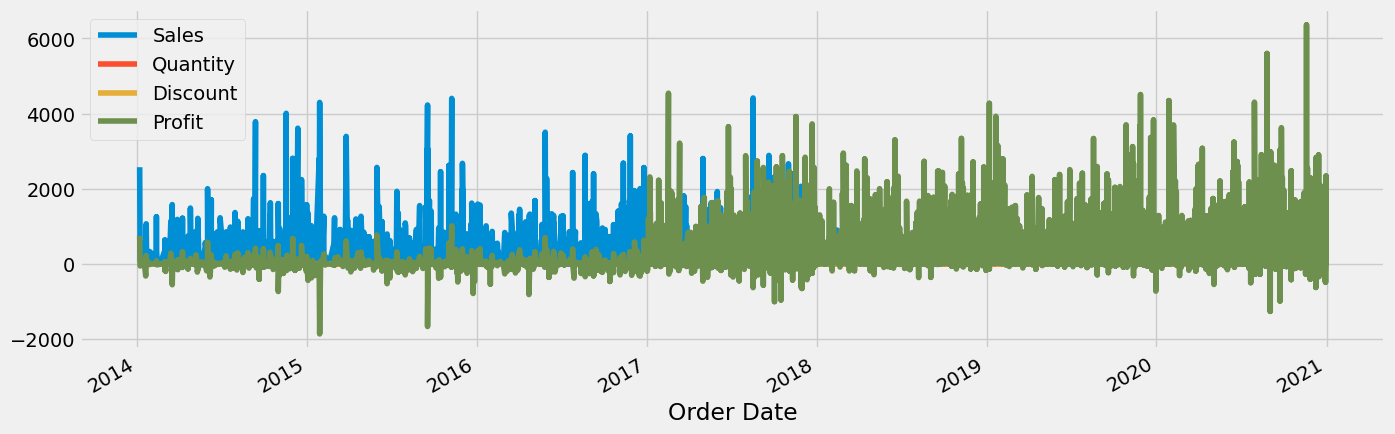

In [35]:
plt.figure(figsize=(16, 6));
merged_df.plot();

# 인덱스 확인

In [36]:
pd.DatetimeIndex(merged_df.index).year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Order Date', length=10699)

In [37]:
pd.DatetimeIndex(merged_df.index).month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Order Date', length=10699)

In [38]:
pd.DatetimeIndex(merged_df.index).day

Int64Index([ 6,  7, 10, 11, 13, 13, 14, 16, 19, 20,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='Order Date', length=10699)

Another useful aspect of the DatetimeIndex is that the individual date/time components are all available as attributes such as year, month, day, and so on. 

Let’s add a few more columns to Technology, containing the year, month, and weekday name.

# year랑 month 추가

In [40]:
# Add columns with year, month, and weekday name
merged_df['Year']         = pd.DatetimeIndex(merged_df.index).year
merged_df['Month']        = pd.DatetimeIndex(merged_df.index).month
#merged_df['Weekday Name'] = pd.DatetimeIndex(merged_df.index).weekday_name

# Display a random sampling of 5 rows
#merged_df.sample(10, random_state=0)

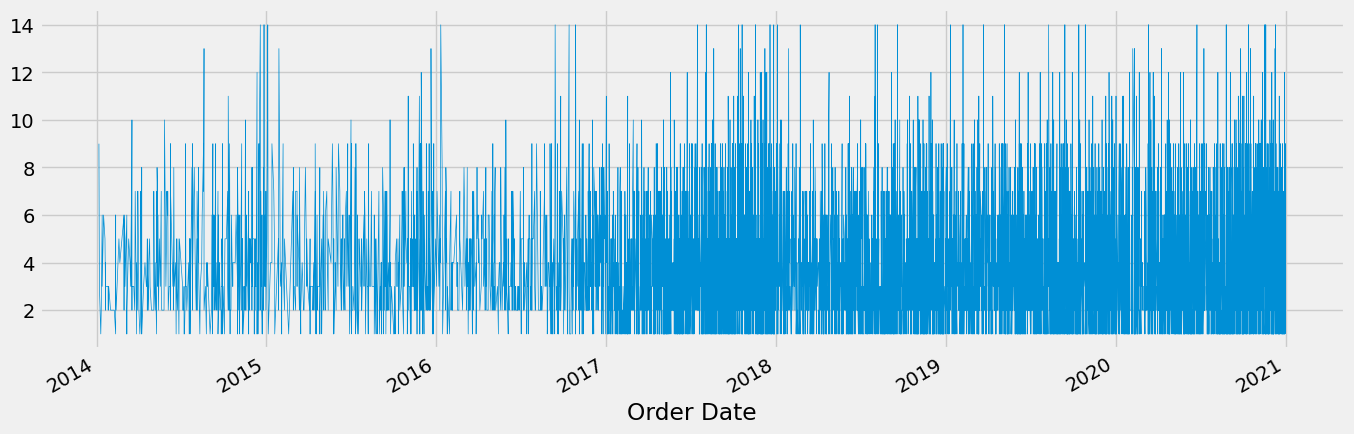

In [41]:
# create a line plot of the full time series of daily sales, 
# using the DataFrame’s plot() method.
merged_df['Quantity'].plot(linewidth=0.5);

 with so many data points, the line plot is crowded and hard to read. Let’s plot the data as dots instead.

# 계절성 조사

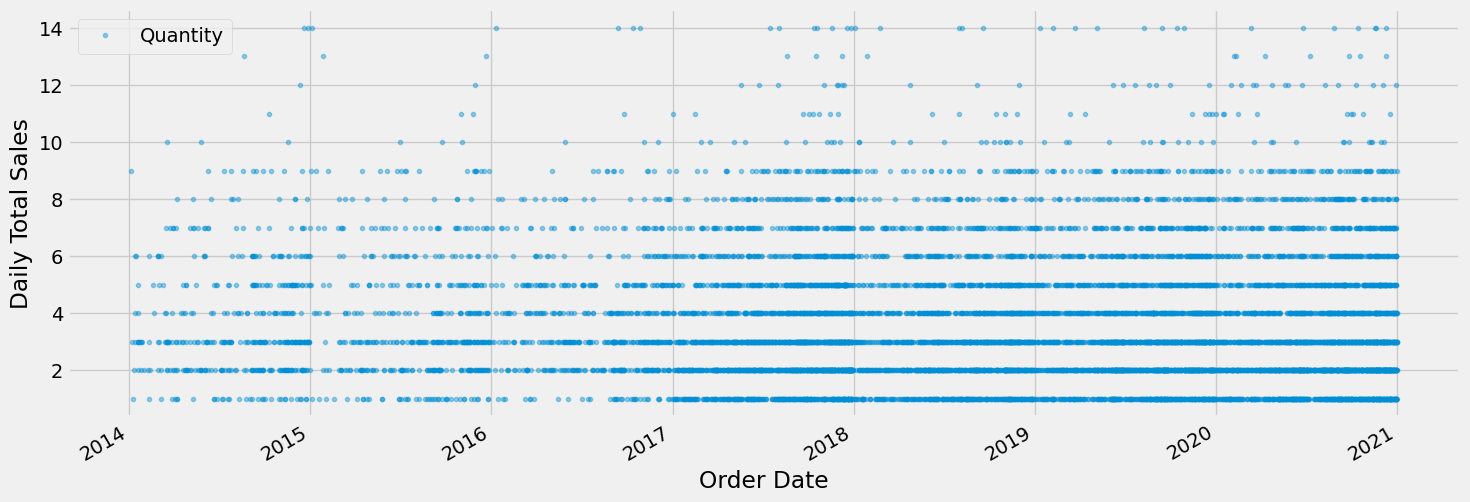

In [42]:
# Use seaborn style defaults and set the default figure size
# sns.set(rc={'figure.figsize':(18, 6)})

cols_plot = ['Quantity']

axes      = merged_df[cols_plot].plot(marker='.',
                                       alpha=0.4, 
                                       linestyle='None', 
                                       figsize=(16, 6), 
                                       subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Total Sales')

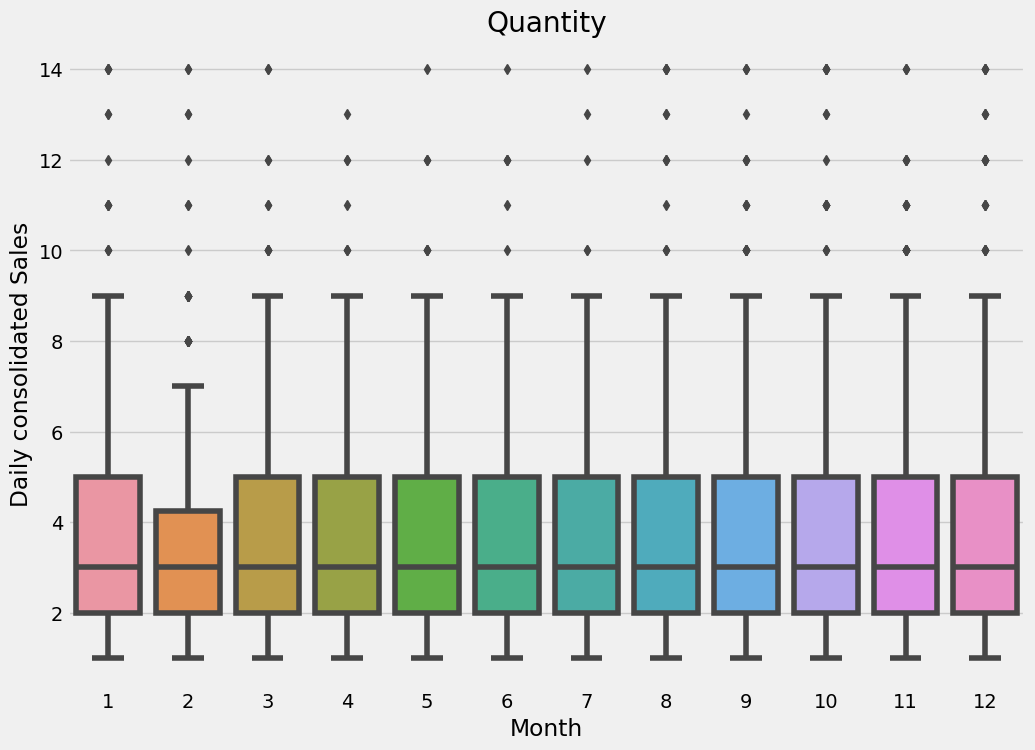

In [43]:
fig, ax = plt.subplots(figsize=(11, 8))
sns.boxplot(data = merged_df, x='Month', y='Quantity', ax=ax)
ax.set_title('Quantity')
ax.set_ylabel('Daily consolidated Sales');

In [ ]:
merged_df.to_excel('me.xlsx', index=True)

In [44]:
merged_df.loc['2014':]

,Sales,Quantity,Discount,Profit,Year,Month
Order Date,,,,,,
2014-01-06,2573.820,9,0.0,746.4078,2014,1
2014-01-07,76.728,3,0.6,-53.7096,2014,1
2014-01-10,51.940,1,0.0,21.2954,2014,1
2014-01-11,9.940,2,0.0,3.0814,2014,1
2014-01-13,545.940,6,0.0,87.3504,2014,1
...,...,...,...,...,...,...
2020-12-31,121.530,3,0.0,358.0800,2020,12
2020-12-31,391.140,3,0.6,120.1680,2020,12
2020-12-31,270.990,9,0.0,2339.6000,2020,12


In [ ]:

cols_plot = ['Quantity']

Furniture.loc['2014'][cols_plot].plot(linewidth=0.5);
Furniture.loc['2015'][cols_plot].plot(linewidth=0.5);
Furniture.loc['2016'][cols_plot].plot(linewidth=0.5);
Furniture.loc['2017'][cols_plot].plot(linewidth=0.5);

In [46]:
merged_df

,Sales,Quantity,Discount,Profit,Year,Month
Order Date,,,,,,
2014-01-06,2573.820,9,0.0,746.4078,2014,1
2014-01-07,76.728,3,0.6,-53.7096,2014,1
2014-01-10,51.940,1,0.0,21.2954,2014,1
2014-01-11,9.940,2,0.0,3.0814,2014,1
2014-01-13,545.940,6,0.0,87.3504,2014,1
...,...,...,...,...,...,...
2020-12-31,121.530,3,0.0,358.0800,2020,12
2020-12-31,391.140,3,0.6,120.1680,2020,12
2020-12-31,270.990,9,0.0,2339.6000,2020,12


# 모델 XGB
# XGB로 1년간 예측

In [48]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [49]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

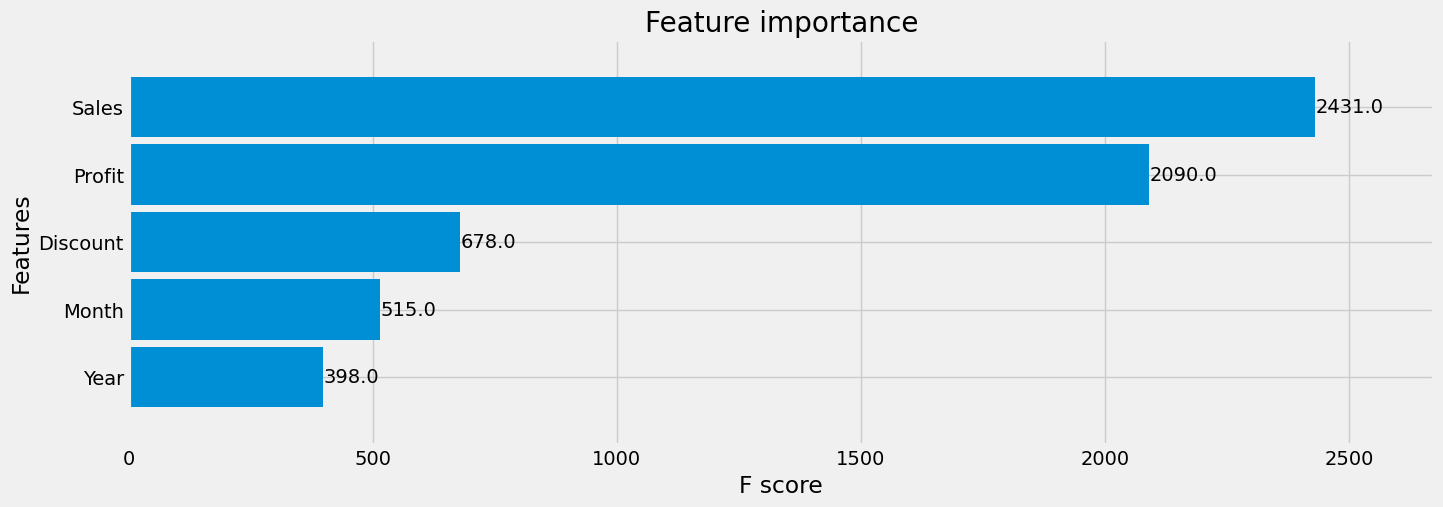

In [50]:
df = merged_df
split = "2019-01-01"
df_train = df[:split]
df_test = df[split:]
df_train_y = df_train.loc[:,'Quantity']
df_train_x = df_train.drop('Quantity', axis=1)
df_test_y = df_test.loc[:,'Quantity']
df_test_x = df_test.drop('Quantity', axis=1)
df_test_orig = df_test.loc[:, ['Month','Year','Quantity','Sales','Profit','Discount']]

XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=100,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

<Axes: xlabel='Order Date'>

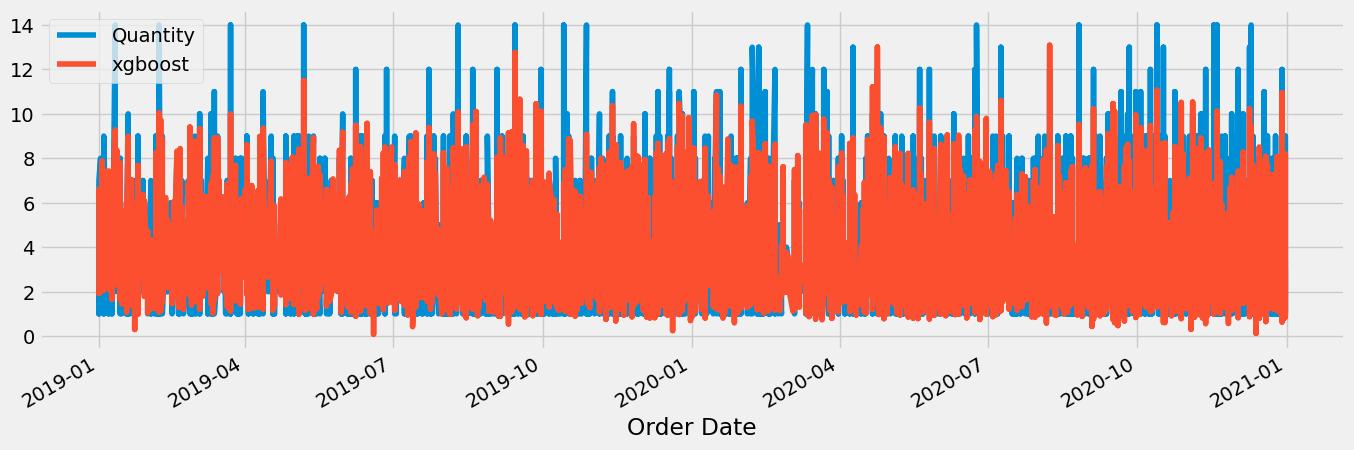

In [51]:
xgboost = XG_model_month.predict(df_test_x)
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(xgboost, columns=['xgboost'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'xgboost']]
result.plot()

# 성능척도

In [53]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 성능 척도 계산
r2 = r2_score(df_test_y, xgboost)
mae = mean_absolute_error(df_test_y, xgboost)
mse = mean_squared_error(df_test_y, xgboost)
rmse = mean_squared_error(df_test_y, xgboost, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: 0.7713239996873011
MAE: 0.6991421037502785
MSE: 1.1983813450816443
RMSE: 1.0947060541906417


GBM

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# LGBM 모델 학습
lgb_train = lgb.Dataset(data=df_train_x, label=df_train_y)
lgb_test = lgb.Dataset(data=df_test_x, label=df_test_y)
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'num_leaves': 31,
          'learning_rate': 0.05,
          'feature_fraction': 0.9}
lgb_model = lgb.train(params=params,
                      train_set=lgb_train,
                      valid_sets=lgb_test,
                      num_boost_round=100)

# 모델 예측
pred = lgb_model.predict(df_test_x, num_iteration=lgb_model.best_iteration)
print(pred)

# 성능척도

In [55]:
r2 = r2_score(df_test_y, pred)
mae = mean_absolute_error(df_test_y, pred)
mse = mean_squared_error(df_test_y, pred)
rmse = mean_squared_error(df_test_y, pred, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: 0.7671315653836563
MAE: 0.7143942025935581
MSE: 1.2203518844172023
RMSE: 1.1046953808255027


<Axes: xlabel='Order Date'>

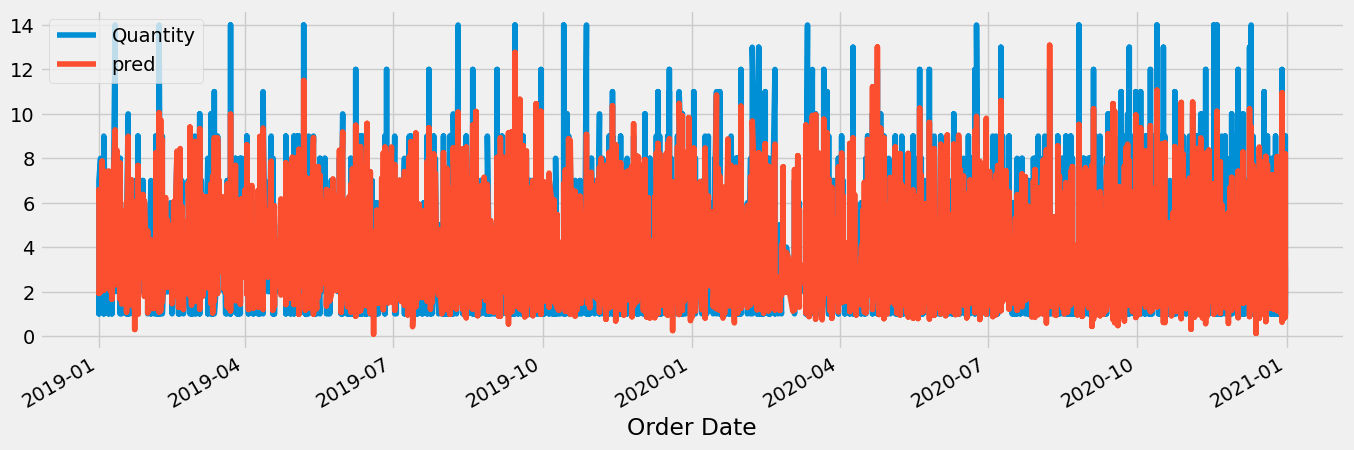

In [56]:

result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(xgboost, columns=['pred'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'pred']]
result.plot()

# PROPHET
# 딱봐도 별로라 의미x

In [58]:
merged_df

,Sales,Quantity,Discount,Profit,Year,Month
Order Date,,,,,,
2014-01-06,2573.820,9,0.0,746.4078,2014,1
2014-01-07,76.728,3,0.6,-53.7096,2014,1
2014-01-10,51.940,1,0.0,21.2954,2014,1
2014-01-11,9.940,2,0.0,3.0814,2014,1
2014-01-13,545.940,6,0.0,87.3504,2014,1
...,...,...,...,...,...,...
2020-12-31,121.530,3,0.0,358.0800,2020,12
2020-12-31,391.140,3,0.6,120.1680,2020,12
2020-12-31,270.990,9,0.0,2339.6000,2020,12


In [68]:
df = merged_df
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Quantity']})

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsega_6fa/kb6w4nk2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsega_6fa/0u0yz_0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60064', 'data', 'file=/tmp/tmpsega_6fa/kb6w4nk2.json', 'init=/tmp/tmpsega_6fa/0u0yz_0e.json', 'output', 'file=/tmp/tmpsega_6fa/prophet_model2rs3lesn/prophet_model-20230517151431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


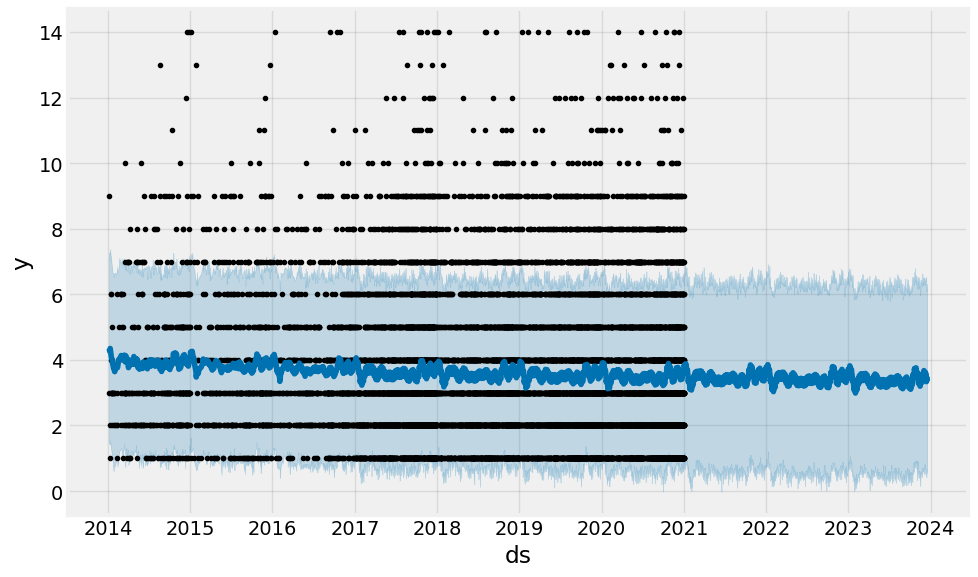

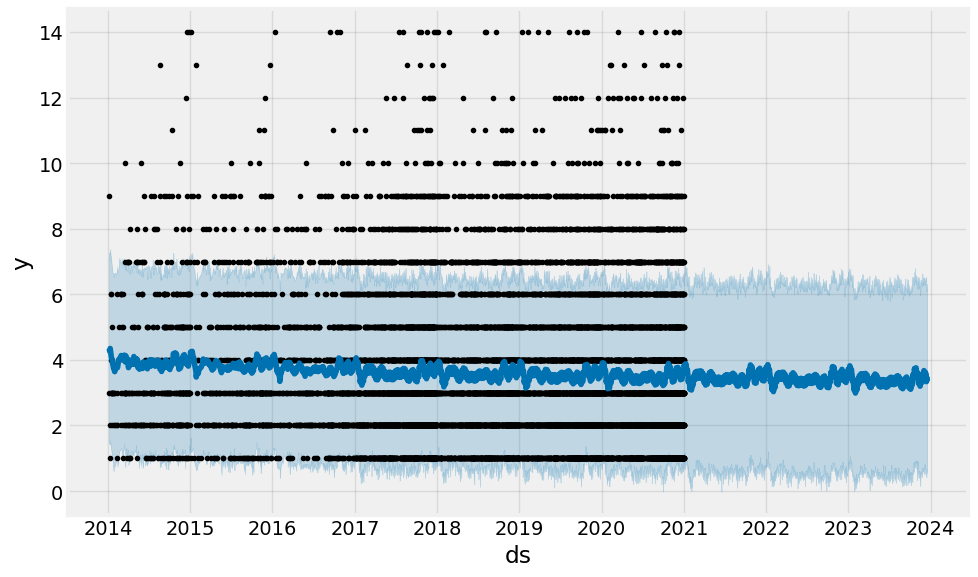

In [72]:
import pandas as pd
from prophet import Prophet
import lightgbm as lgb
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# 데이터 로드
df = df_prophet

# Prophet용 데이터프레임으로 변환
df['ds'] = pd.to_datetime(df['ds'])
#df = df.rename(columns={'ds': df.index, 'Quantity': 'y'})

# Prophet 모델 초기화 및 학습
model = Prophet()
model.fit(df_prophet)

# 향후 30일간의 예측 생성
future = model.make_future_dataframe(periods=1080)
forecast = model.predict(future)

# 예측 결과 시각화
model.plot(forecast)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 실제값과 예측값 추출
actual = df['y'].values  # 실제값은 'y' 열에 저장되어 있습니다.
predicted = forecast['yhat'].values  # 예측값은 'yhat' 열에 저장되어 있습니다.

# MAE 계산
mae = mean_absolute_error(actual, predicted)
print("MAE:", mae)

# MSE 계산
mse = mean_squared_error(actual, predicted)
print("MSE:", mse)

# RMSE 계산
rmse = mean_squared_error(actual, predicted, squared=False)
print("RMSE:", rmse)

ValueError: ignored